I tried to write some kind of output manager for Gevolution which can load, analyze and visualize outputs easily.
For first step I tried to make loader for the output data. 
So you can feed code by "setting.ini" file and load all of data.
Actually this package (if it was usefull) can be equiped with any kind of statistical analyzer which you wish (and possible!).
Using python language will be good because of variety of packages in this language and simple link making by other 
languages.
Also for large data maybe we can make a link between this and LATField.

In [1]:
from gev import *
import matplotlib.pylab as plt
%matplotlib inline

path = '/home/gf/work/forsat/geneva_works/farbod/gom\
/gevolution_samples/case_1/settings.ini'
sample1 = gev_analyze(path)

path = '/home/gf/work/forsat/geneva_works/farbod/gom\
/gevolution_samples/case_2/settings.ini'
sample2 = gev_analyze(path)

### Data loading sample

In [2]:
help(sample1.load)

Help on method load in module gev:

load(self, typ, name, nfile) method of gev.gev_analyze instance
    This method is for loading requested outputs of 
    desired setting file which is specified in instance.
    inputs:
    1- typ is type of requested file (snap or pk)
    2- name is requested filed (for example phi, chi, etc)
    3- nfile is the snapshot number of requested filed.



In [3]:
T00 = sample1.load('snap','T00',1)

### A 2D intersection of $T_{00}$ Field.

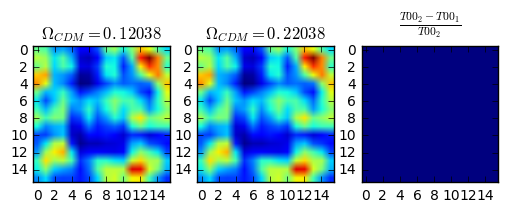

In [4]:
T00_1 = sample1.load('snap','T00',1)
plt.subplot(1,3,1)
plt.imshow(T00_1[:,:,1])
plt.title(r'$\Omega_{CDM}='+\
          str(sample1.setting['omega_cdm'][0])+'$')

T00_2 = sample2.load('snap','T00',1)
plt.subplot(1,3,2)
plt.imshow(T00_2[:,:,1])
plt.title(r'$\Omega_{CDM}='+\
          str(sample2.setting['omega_cdm'][0])+'$')

plt.subplot(1,3,3)
plt.imshow((T00_2[:,:,1]-T00_1[:,:,1])/T00_2[:,:,1])
plt.title(r'$\frac{T00_2-T00_1}{T00_2}$', y=1.08)

### Or if you want to load particles information and do analysis or visualize on them.

In [5]:
pcls = sample1.load('snap','pcls',1)

### Particles

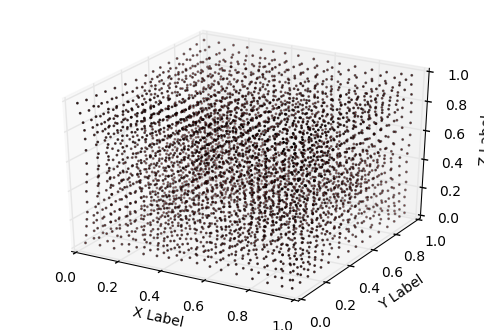

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = pcls['positionX']
ys = pcls['positionY']
zs = pcls['positionZ']
ax.scatter(xs, ys, zs, c='r', marker='o',s=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

plt.show()

### Vector filed

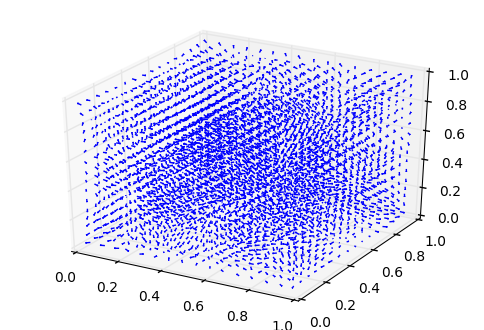

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

x = pcls['positionX']
y = pcls['positionY']
z = pcls['positionZ']

u = pcls['velocityX']
v = pcls['velocityY']
w = pcls['velocityZ']

ax.quiver(x, y, z, u, v, w, length=0.02)

plt.show()

## Also for spectrums:

### Loading:

In [8]:
pk1 = sample1.load('pk','phi',1)
pk2 = sample2.load('pk','phi',1)

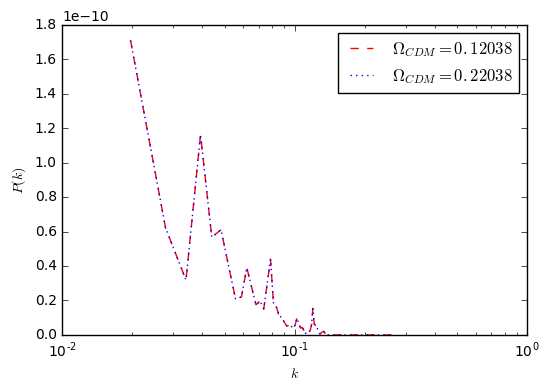

In [9]:
plt.plot(pk1[:,0],pk1[:,1],'r--',label=r'$\Omega_{CDM}='+\
          str(sample1.setting['omega_cdm'][0])+'$')

plt.plot(pk2[:,0],pk2[:,1],'b:',label=r'$\Omega_{CDM}='+\
          str(sample2.setting['omega_cdm'][0])+'$')

plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')
plt.xscale('log')
plt.legend(loc='best')

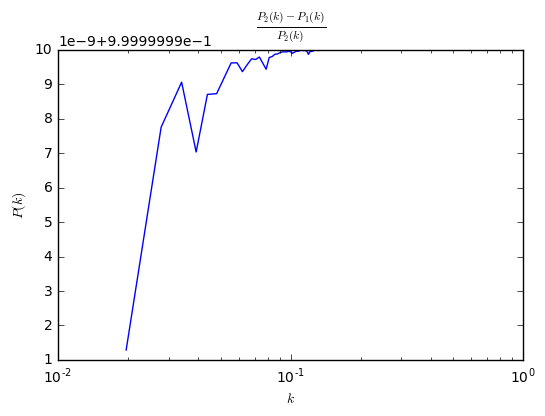

In [10]:
plt.plot(pk1[:,0],(pk2[:,0]-pk1[:,1])/pk2[:,0])
plt.title(r'$\frac{P_2(k)-P_1(k)}{P_2(k)}$', y=1.04)
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')
plt.xscale('log')